<a href="https://colab.research.google.com/github/snr131/Data-Analytics-Microcredential/blob/projects/office_supply_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Office Supply Analysis
A fictitious office supply company operates three regional offices "Regions" which sell five products "Items."   



In [1]:
# import pandas and define a variable with which to view the data
import pandas as pd

In [2]:
df = pd.read_csv('/content/drive/MyDrive/School/Microcredential/Tableau/OfficeSupplies.csv')

In [3]:
# use the info function to view a summary of the data provided
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   OrderDate   43 non-null     object 
 1   Region      43 non-null     object 
 2   Rep         43 non-null     object 
 3   Item        43 non-null     object 
 4   Units       43 non-null     int64  
 5   Unit Price  43 non-null     float64
dtypes: float64(1), int64(1), object(4)
memory usage: 2.1+ KB


In [4]:
# price per unit differs across regions, e.g. the price of the Pen Set isn't the same for all Pen Sets sold
df.head(20)

,OrderDate,Region,Rep,Item,Units,Unit Price
0,4-Jul-2014,East,Richard,Pen Set,62,4.99
1,12-Jul-2014,East,Nick,Binder,29,1.99
2,21-Jul-2014,Central,Morgan,Pen Set,55,12.49
3,29-Jul-2014,East,Susan,Binder,81,19.99
4,7-Aug-2014,Central,Matthew,Pen Set,42,23.95
5,15-Aug-2014,East,Richard,Pencil,35,4.99
6,24-Aug-2014,West,James,Desk,3,275.00
7,1-Sep-2014,Central,Smith,Desk,2,125.00
8,10-Sep-2014,Central,Bill,Pencil,7,1.29
9,18-Sep-2014,East,Richard,Pen Set,16,15.99


The csv includes OrderDate, Region, Rep, Item, Unit, and Unit Price. 

1. Using OrderDate, what is the time period of this csv?
2. Which of the three regions earns the most in total sales?
3. Which item is most popular (units sold) overall and per region?
4. After identifying the most popular item, what is its percentage of total sales across all regions?
5. Which months have the highest sales?
6. Which reps have the highest sales, in units sold and total sales?

# 1. Using OrderDate, what is the time period of this csv?

The included time period begins on July 4, 2014 and ends on June 25, 2015. 22 orders were taken during 2014 and 21 orders were taken in 2015. 

In [5]:
# covert the OrderDate column to a pandas datetime data type
df['OrderDate'] = pd.to_datetime(df['OrderDate'])

In [6]:
# create columns to sort by day, month, and year
df['Day'] = df['OrderDate'].apply(lambda time: time.day)
df['Month'] = df['OrderDate'].apply(lambda time: time.month)
df['Year'] = df['OrderDate'].apply(lambda time: time.year)

In [7]:
# the min OrderDate is the time period start date
min(df['OrderDate'])

Timestamp('2014-07-04 00:00:00')

In [8]:
# the max OrderDate is the time period end date
max(df['OrderDate'])

Timestamp('2015-06-25 00:00:00')

In [9]:
# just for fun, use value_counts to show the number of orders received during each year in this available time period
df['Year'].value_counts()

2014    22
2015    21
Name: Year, dtype: int64

# 2. Which of the three regions earns the most in total sales?

The Central region earns the highest in total sales, accountings for about 57% of total sales across all three regions.

In [10]:
# create a new column "Total Sales" using the existing "Units" and "Unit Price" columns
# convert the "Units" and "Unit Price" columns to integer and float respectively
df['Units'] = df['Units'].astype(int)
df['Unit Price'] = df['Unit Price'].astype(float)
df['Total Sales'] = df['Units'] * df['Unit Price']

In [11]:
# check the current columns and corresponding data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   OrderDate    43 non-null     datetime64[ns]
 1   Region       43 non-null     object        
 2   Rep          43 non-null     object        
 3   Item         43 non-null     object        
 4   Units        43 non-null     int64         
 5   Unit Price   43 non-null     float64       
 6   Day          43 non-null     int64         
 7   Month        43 non-null     int64         
 8   Year         43 non-null     int64         
 9   Total Sales  43 non-null     float64       
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 3.5+ KB


In [12]:
# see the new "Total Sales" column
df.head()

,OrderDate,Region,Rep,Item,Units,Unit Price,Day,Month,Year,Total Sales
0,2014-07-04,East,Richard,Pen Set,62,4.99,4,7,2014,309.38
1,2014-07-12,East,Nick,Binder,29,1.99,12,7,2014,57.71
2,2014-07-21,Central,Morgan,Pen Set,55,12.49,21,7,2014,686.95
3,2014-07-29,East,Susan,Binder,81,19.99,29,7,2014,1619.19
4,2014-08-07,Central,Matthew,Pen Set,42,23.95,7,8,2014,1005.90


In [13]:
# import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

In [14]:
# use value_counts to view the number of records per region during the time period (one records probably amounts to one order)  
df['Region'].value_counts()

Central    24
East       13
West        6
Name: Region, dtype: int64

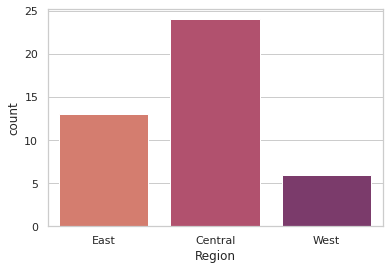

In [15]:
# use a count plot to view the number of records per region during this time period (one records probably amounts to one order) 
sns.countplot(x='Region',data=df,palette="flare")

In [16]:
# use groupby to view the total sales per region
df.groupby(by=['Region'])['Total Sales'].sum()

Region
Central    11139.07
East        6002.09
West        2486.72
Name: Total Sales, dtype: float64

In [17]:
# use sum to find the grand total across all regions
sum(df['Total Sales'])

19627.879999999997

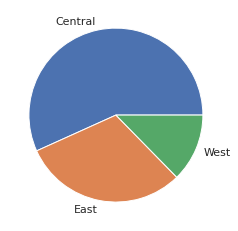

In [18]:
# plot the total sales by region for a quick visual
salespie = df.groupby(by=df["Region"]).sum()
plt.pie(x=salespie["Total Sales"], labels=salespie.index)
plt.show()

# 3. Which item is most popular (units sold) overall and per region?

The most popular item overall is the binder. The least popular item overall is the desk. In the East region indivdual pencils have the highest units sold, desks aren't sold at all. In the Central region pen sets have the highest units sold, and desks least units sold. In the West region indivdual pens have the highest units sold, and pen sets aren't sold at all.

In [19]:
# use value_counts to view the number of units sold per item across all regions
df['Item'].value_counts()

Binder     15
Pencil     13
Pen Set     7
Pen         5
Desk        3
Name: Item, dtype: int64

In [20]:
# when evaluating units sold and revenue earned, consider the price per unit
# using groupby and mean, see the average cost per unit
df.groupby('Item')['Unit Price'].mean()

Item
Binder      11.524000
Desk       175.000000
Pen         11.190000
Pen Set     11.912857
Pencil       2.774615
Name: Unit Price, dtype: float64

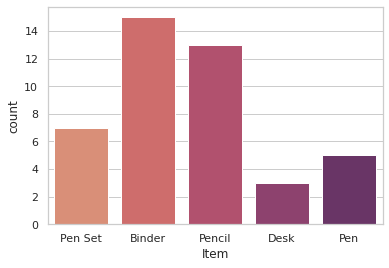

In [21]:
# use a countplot to show the number of units sold per item across all regions
sns.countplot(x='Item',data=df,palette="flare")

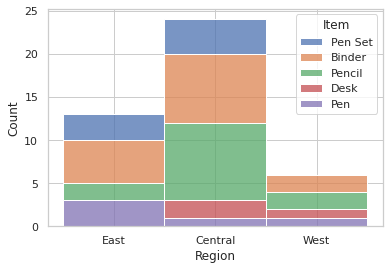

In [22]:
# a hist plot shows a quick breakdown of number of units sold per item per region
sns.histplot(data=df, x="Region", hue="Item", multiple="stack")

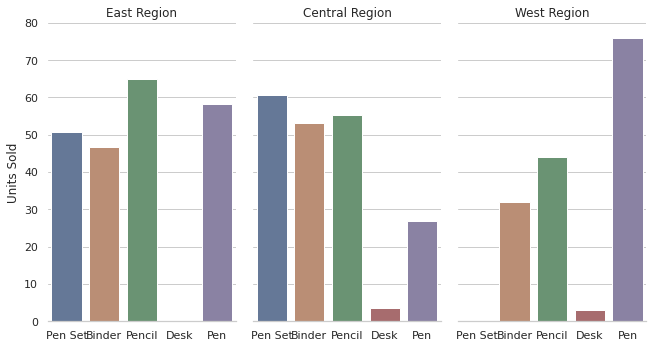

In [23]:
# use a catplot to see the breakdown of units sold per item per region
u = sns.catplot(x="Item", y="Units", col="Region",
                data=df, saturation=.5,
                kind="bar", ci=None, aspect=.6)
(u.set_axis_labels("", "Units Sold")
  .set_xticklabels(["Pen Set", "Binder", "Pencil", "Desk", "Pen"])
  .set_titles("{col_name} {col_var}")
  .set(ylim=(0, 80))
  .despine(left=True))  

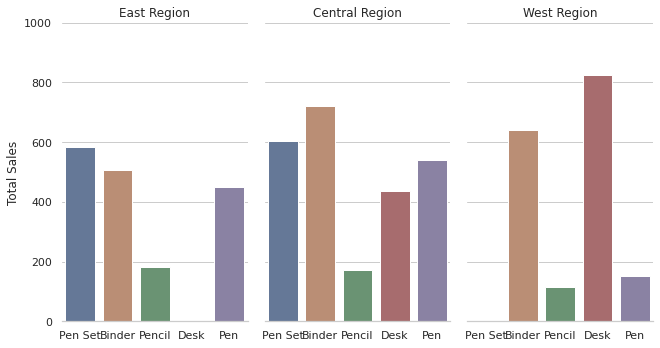

In [24]:
# compare to the above catplot, here showing total sales per item per region
up = sns.catplot(x="Item", y="Total Sales", col="Region",
                data=df, saturation=.5,
                kind="bar", ci=None, aspect=.6)
(up.set_axis_labels("", "Total Sales")
  .set_xticklabels(["Pen Set", "Binder", "Pencil", "Desk", "Pen"])
  .set_titles("{col_name} {col_var}")
  .set(ylim=(0, 1000))
  .despine(left=True)) 

# 4. After identifying the most popular item, what is its percentage of total sales across all regions?

About 49% of revenue is earned from binder sales.

In [25]:
df.groupby(by=['Item'])['Total Sales'].sum()

Item
Binder     9577.65
Desk       1700.00
Pen        2045.22
Pen Set    4169.87
Pencil     2135.14
Name: Total Sales, dtype: float64

In [26]:
binder = df['Item'] == 'Binder'
binder_sales = df.groupby(by=binder)['Total Sales'].sum()

In [27]:
grand_total = (sum(df['Total Sales']))
print(grand_total)

19627.879999999997


In [28]:
binder_sales / grand_total

Item
False    0.512038
True     0.487962
Name: Total Sales, dtype: float64

# 5. Which months have the highest sales?

Though, in order, the months with the most units sold are April 2015, December 2014, and May 2015 the three months with the highest sales in order December 2014, July 2014, and February 2014. More units sold doesn't necessarily indicate more revenue.

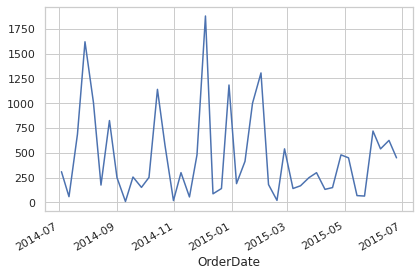

In [29]:
# with total sales information, plot total sales fluctuations over time
df.groupby('OrderDate').sum()['Total Sales'].plot()
plt.tight_layout()

In [37]:
bymonth_df = df.groupby(['Month', 'Year']).agg({'Units': sum, 'Total Sales': sum})
print(bymonth_df)

            Units  Total Sales
Month Year                    
1     2015    191      1602.09
2     2015    154      2044.33
3     2015    113       556.87
4     2015    297      1059.03
5     2015    255      1300.35
6     2015    155      1613.50
7     2014    227      2673.23
8     2014     80      2005.55
9     2014    101       666.11
10    2014    163      1984.57
11    2014    122       833.78
12    2014    263      3288.47


In [44]:
bestmonths = bymonth_df.max()
print(bestmonths)

Units           297.00
Total Sales    3288.47
dtype: float64


# 6. Which reps have the highest sales, in units sold and total sales?

Richard sold the highest number of units, Matthew earned the highest revenue.

In [31]:
rep_df = df.groupby(['Rep']).agg({'Units': sum, 'Total Sales': sum})
print(rep_df)

         Units  Total Sales
Rep                        
Alex       281      2812.19
Bill       213      1749.87
James      142      1283.61
Matthew    193      3109.44
Morgan     173      1387.77
Nick       125       536.75
Rachel     183       438.37
Richard    396      2363.04
Smith      156      1641.43
Susan      170      3102.30
Thomas      89      1203.11


In [32]:
maxValues = rep_df.max()
print(maxValues)

Units           396.00
Total Sales    3109.44
dtype: float64


In [33]:
rep_df.loc[rep_df['Units'] == 396.00]

,Units,Total Sales
Rep,,
Richard,396,2363.04


In [34]:
rep_df.loc[rep_df['Total Sales'] == 3109.44]

,Units,Total Sales
Rep,,
Matthew,193,3109.44
